In [1]:
# Importing necessary libraries

import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

import numpy as np
import matplotlib.pyplot as plt
import os
import time
import random

# Fetching data from dataset

In [2]:
# Path to dataset file
path_to_file = './Dataset/tunes.txt'

In [3]:
# Read the dataset text file and, then decode for py2 compat.
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

# length of text is the number of characters in the file
print('Length of text: {} characters'.format(len(text)))

Length of text: 155224 characters


In [4]:
# Printing the 1st 200 characters of dataset

print(text[:250])

X: 1
T:A and D
% Nottingham Music Database
S:EF
M:4/4
K:A
M:6/8
P:A
f|"A"ecc c2f|"A"ecc c2f|"A"ecc c2f|"Bm"BcB "E7"B2f|
"A"ecc c2f|"A"ecc c2c/2d/2|"D"efe "E7"dcB| [1"A"Ace a2:|
 [2"A"Ace ag=g||\
K:D
P:B
"D"f2f Fdd|"D"AFA f2e/2f/2|"G"g2g ecd|"Em"efd "


# Pre- processing of data

In [5]:
# Grouping all the unique characters
# 'vocab' is a set containing all unique characters present in 'text'
vocab = sorted(set(text))

print('Number of unique characters is: {}'.format(len(vocab)))

Number of unique characters is: 87


In [6]:
# Creating a mapping table from unique characters to index
char2idx = {ch:i for i, ch in enumerate(vocab)}

# Creating a mapping from index to unique characters
idx2char = np.array(vocab)

# Representing each character in text as its integer representation
text_as_int = np.array([char2idx[ch] for ch in text])

print(char2idx)

{'\n': 0, ' ': 1, '!': 2, '"': 3, '#': 4, '%': 5, '&': 6, "'": 7, '(': 8, ')': 9, '+': 10, ',': 11, '-': 12, '.': 13, '/': 14, '0': 15, '1': 16, '2': 17, '3': 18, '4': 19, '5': 20, '6': 21, '7': 22, '8': 23, '9': 24, ':': 25, '=': 26, '>': 27, '?': 28, 'A': 29, 'B': 30, 'C': 31, 'D': 32, 'E': 33, 'F': 34, 'G': 35, 'H': 36, 'I': 37, 'J': 38, 'K': 39, 'L': 40, 'M': 41, 'N': 42, 'O': 43, 'P': 44, 'Q': 45, 'R': 46, 'S': 47, 'T': 48, 'U': 49, 'V': 50, 'W': 51, 'X': 52, 'Y': 53, '[': 54, '\\': 55, ']': 56, '^': 57, '_': 58, 'a': 59, 'b': 60, 'c': 61, 'd': 62, 'e': 63, 'f': 64, 'g': 65, 'h': 66, 'i': 67, 'j': 68, 'k': 69, 'l': 70, 'm': 71, 'n': 72, 'o': 73, 'p': 74, 'q': 75, 'r': 76, 's': 77, 't': 78, 'u': 79, 'v': 80, 'w': 81, 'x': 82, 'y': 83, 'z': 84, '|': 85, '~': 86}


In [7]:
print(repr(text[:13]), ' ------ is mapped to ------>>', text_as_int[:13])

# Eaxh character is represented using its corresponding index

'X: 1\nT:A and '  ------ is mapped to ------>> [52 25  1 16  0 48 25 29  1 59 72 62  1]


In [8]:
# The maximum length sentence you want for a single input in characters
# The max length of a training sequence is taken as 100
seq_length = 100

# Calculating the number of training sequences in each epoch
examples_per_epoch = len(text)//(seq_length+1)

# Create the dataset: The datatset contains tensors of each individual character
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

print('Structure of the dataset:\n')

# Printing the 1st 6 elements in the dataset
for element in char_dataset.take(6):
    # printing in the form: element --> character corresponding to index shown in element
    print(element, ' --> Corresponding character: ', idx2char[element.numpy()])
    
# The 3rd character is actually space (' ') and the 5th character is actually newline character ('\n')

Structure of the dataset:

tf.Tensor(52, shape=(), dtype=int64)  --> Corresponding character:  X
tf.Tensor(25, shape=(), dtype=int64)  --> Corresponding character:  :
tf.Tensor(1, shape=(), dtype=int64)  --> Corresponding character:   
tf.Tensor(16, shape=(), dtype=int64)  --> Corresponding character:  1
tf.Tensor(0, shape=(), dtype=int64)  --> Corresponding character:  

tf.Tensor(48, shape=(), dtype=int64)  --> Corresponding character:  T


In [9]:
'''
The char_dataset contains tensors for each individual character. So it contains 155224 characters in form of tensors
Now we will slice this dataset into sequences of length 101 each. (seq_length + 1 = 100 + 1)
This is done by batch() method
'''

# The batch method lets us easily convert these individual characters to sequences of the desired size.
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

print('1st 5 sequences are: \n')
# Printing the 1st 5 sequences
i=0
for item in sequences.take(5):
    # Printing in the format: Seq number --> length of sequence --> Sequence
    print('Sequence ', i, '--> ', len(item.numpy()), ' --> ', repr(''.join(idx2char[item.numpy()])))
    i+=1
    

1st 5 sequences are: 

Sequence  0 -->  101  -->  'X: 1\nT:A and D\n% Nottingham Music Database\nS:EF\nM:4/4\nK:A\nM:6/8\nP:A\nf|"A"ecc c2f|"A"ecc c2f|"A"ecc c2'
Sequence  1 -->  101  -->  'f|"Bm"BcB "E7"B2f|\n"A"ecc c2f|"A"ecc c2c/2d/2|"D"efe "E7"dcB| [1"A"Ace a2:|\n [2"A"Ace ag=g||\\\nK:D\nP:B'
Sequence  2 -->  101  -->  '\n"D"f2f Fdd|"D"AFA f2e/2f/2|"G"g2g ecd|"Em"efd "A7"cBA|\n"D"f^ef dcd|"D"AFA f=ef|"G"gfg "A7"ABc |1"D"d'
Sequence  3 -->  101  -->  '3 d2e:|2"D"d3 d2||\n\n\n\nX: 2\nT:Abacus\n% Nottingham Music Database\nS:By Hugh Barwell, via Phil Rowe\nM:6/'
Sequence  4 -->  101  -->  '8\nK:G\n"G"g2g B^AB|d2d G3|"Em"GAB "Am"A2A|"D7"ABc "G"BAG|\n"G"g2g B^AB|d2d G2G|"Em"GAB "Am"A2G|"D7"FGA '


In [10]:
# For each sequence,
# duplicate and shift it to form the input and target text by using the map method to apply a simple function to each batch:

'''
For each sequence consisting of 101 characters (char no. 0 to 100), 
1st 100 characters (Char no. 0 to 99) will form the the input text sequence or training sequence
Last 100 characters (char no. 1 to 100) will form the target sequence or expected sequence.
These 2 newly formed sequences are mapped to each other.
'''

def split_input_sequence(sequence):
    input_text = sequence[:-1]
    target_text = sequence[1:]
    return input_text, target_text

dataset = sequences.map(split_input_sequence)

In [11]:
# Printing the 1st input sequence and its corresponding target sequence

for input_seq, target_seq in dataset.take(1):
    print('Input seq  --> ', repr(''.join(idx2char[input_seq.numpy()])))
    print('Target seq --> ', repr(''.join(idx2char[target_seq.numpy()])))

# Each entry in dataset is like: (input_Seq, target_Seq)

Input seq  -->  'X: 1\nT:A and D\n% Nottingham Music Database\nS:EF\nM:4/4\nK:A\nM:6/8\nP:A\nf|"A"ecc c2f|"A"ecc c2f|"A"ecc c'
Target seq -->  ': 1\nT:A and D\n% Nottingham Music Database\nS:EF\nM:4/4\nK:A\nM:6/8\nP:A\nf|"A"ecc c2f|"A"ecc c2f|"A"ecc c2'


# Creating training batches

In [12]:
# Batch size
BATCH_SIZE = 64

# Creating batches of the dataset
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

# Building the model

In [13]:
# Length of the vocabulary in chars- or Number of unique characters
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 256

In [14]:
# This model will be used for music generation

def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim,
                                  batch_input_shape=[batch_size, None]),
        tf.keras.layers.GRU(rnn_units,
                            return_sequences=True,
                            stateful=True,
                            recurrent_initializer='glorot_uniform'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.GRU(rnn_units,
                            return_sequences=True,
                            stateful=True,
                            recurrent_initializer='glorot_uniform'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.GRU(rnn_units,
                            return_sequences=True,
                            stateful=True,
                            recurrent_initializer='glorot_uniform'),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(vocab_size)),
    ])
    
    return model

In [15]:
model = build_model(
    vocab_size=len(vocab),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units,
    batch_size=BATCH_SIZE)

In [16]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (64, None, 256)           22272     
_________________________________________________________________
gru (GRU)                    (64, None, 256)           394752    
_________________________________________________________________
dropout (Dropout)            (64, None, 256)           0         
_________________________________________________________________
gru_1 (GRU)                  (64, None, 256)           394752    
_________________________________________________________________
dropout_1 (Dropout)          (64, None, 256)           0         
_________________________________________________________________
gru_2 (GRU)                  (64, None, 256)           394752    
_________________________________________________________________
dropout_2 (Dropout)          (64, None, 256)           0

In [17]:
# Loss function- Function used to calculate the loss using 'sparse_categorical_crossentropy' method

def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

In [18]:
# Cheching the functioning of the model
'''
We can check how well the untrained model works by feeding the 1st input sequence into the model
and then comparing the result with the result with the 1st target sequence with the help of our loss function
'''
# Feeding the 1st input sequence into the model
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    example_batch_loss = loss(target_example_batch, example_batch_predictions)
    print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
    print("scalar_loss:      ", example_batch_loss.numpy().mean())

Prediction shape:  (64, 100, 87)  # (batch_size, sequence_length, vocab_size)
scalar_loss:       4.4653788


In [19]:
# compile the model

print("[INFO] compiling model...")
model.compile(optimizer='adam', loss=loss)

[INFO] compiling model...


In [20]:
'''
Now, we will save the weights of the final model
'''

# Name of the checkpoint files
checkpoint_path = "./Model_ckpt/model_final_checkpoint"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True)

In [21]:
EPOCHS = 250

print("[INFO] training model...")

History = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])

[INFO] training model...
Epoch 1/250
24/24 [==============================] - 1s 62ms/step - loss: 3.7387
Epoch 2/250
24/24 [==============================] - 1s 61ms/step - loss: 3.2703
Epoch 3/250
24/24 [==============================] - 1s 61ms/step - loss: 2.9517
Epoch 4/250
24/24 [==============================] - 1s 62ms/step - loss: 2.5220
Epoch 5/250
24/24 [==============================] - 1s 62ms/step - loss: 2.2689
Epoch 6/250
24/24 [==============================] - 1s 62ms/step - loss: 2.0422
Epoch 7/250
24/24 [==============================] - 1s 62ms/step - loss: 1.8922
Epoch 8/250
24/24 [==============================] - 1s 61ms/step - loss: 1.7845
Epoch 9/250
24/24 [==============================] - 2s 63ms/step - loss: 1.7099
Epoch 10/250
24/24 [==============================] - 1s 62ms/step - loss: 1.6410
Epoch 11/250
24/24 [==============================] - 1s 62ms/step - loss: 1.5840
Epoch 12/250
24/24 [==============================] - 1s 62ms/step - loss: 1.5329


24/24 [==============================] - 2s 63ms/step - loss: 0.6504
Epoch 101/250
24/24 [==============================] - 1s 62ms/step - loss: 0.6463
Epoch 102/250
24/24 [==============================] - 2s 63ms/step - loss: 0.6410
Epoch 103/250
24/24 [==============================] - 1s 62ms/step - loss: 0.6387
Epoch 104/250
24/24 [==============================] - 2s 63ms/step - loss: 0.6339
Epoch 105/250
24/24 [==============================] - 1s 62ms/step - loss: 0.6264
Epoch 106/250
24/24 [==============================] - 1s 62ms/step - loss: 0.6218
Epoch 107/250
24/24 [==============================] - 2s 63ms/step - loss: 0.6213
Epoch 108/250
24/24 [==============================] - 1s 61ms/step - loss: 0.6132
Epoch 109/250
24/24 [==============================] - 2s 63ms/step - loss: 0.6111
Epoch 110/250
24/24 [==============================] - 1s 62ms/step - loss: 0.6078
Epoch 111/250
24/24 [==============================] - 2s 63ms/step - loss: 0.6004
Epoch 112/250
24/2

24/24 [==============================] - 2s 63ms/step - loss: 0.3840
Epoch 199/250
24/24 [==============================] - 2s 63ms/step - loss: 0.3850
Epoch 200/250
24/24 [==============================] - 2s 63ms/step - loss: 0.3813
Epoch 201/250
24/24 [==============================] - 2s 63ms/step - loss: 0.3817
Epoch 202/250
24/24 [==============================] - 2s 63ms/step - loss: 0.3796
Epoch 203/250
24/24 [==============================] - 2s 63ms/step - loss: 0.3807
Epoch 204/250
24/24 [==============================] - 2s 63ms/step - loss: 0.3775
Epoch 205/250
24/24 [==============================] - 2s 63ms/step - loss: 0.3779
Epoch 206/250
24/24 [==============================] - 2s 63ms/step - loss: 0.3799
Epoch 207/250
24/24 [==============================] - 1s 62ms/step - loss: 0.3777
Epoch 208/250
24/24 [==============================] - 1s 62ms/step - loss: 0.3766
Epoch 209/250
24/24 [==============================] - 1s 61ms/step - loss: 0.3754
Epoch 210/250
24/2

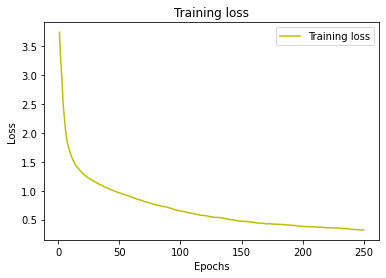

In [22]:
# Plotting the loss during training

loss = History.history['loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

MODEL TRAINED!